# Day 10

In [97]:
from aoc import read_lines

sample = """noop
addx 3
addx -5""".splitlines()

sample2 = """addx 15
addx -11
addx 6
addx -3
addx 5
addx -1
addx -8
addx 13
addx 4
noop
addx -1
addx 5
addx -1
addx 5
addx -1
addx 5
addx -1
addx 5
addx -1
addx -35
addx 1
addx 24
addx -19
addx 1
addx 16
addx -11
noop
noop
addx 21
addx -15
noop
noop
addx -3
addx 9
addx 1
addx -3
addx 8
addx 1
addx 5
noop
noop
noop
noop
noop
addx -36
noop
addx 1
addx 7
noop
noop
noop
addx 2
addx 6
noop
noop
noop
noop
noop
addx 1
noop
noop
addx 7
addx 1
noop
addx -13
addx 13
addx 7
noop
addx 1
addx -33
noop
noop
noop
addx 2
noop
noop
noop
addx 8
noop
addx -1
addx 2
addx 1
noop
addx 17
addx -9
addx 1
addx 1
addx -3
addx 11
noop
noop
addx 1
noop
addx 1
noop
noop
addx -13
addx -19
addx 1
addx 3
addx 26
addx -30
addx 12
addx -1
addx 3
addx 1
noop
noop
noop
addx -9
addx 18
addx 1
addx 2
noop
noop
addx 9
noop
noop
noop
addx -1
addx 2
addx -37
addx 1
addx 3
noop
addx 15
addx -21
addx 22
addx -6
addx 1
noop
addx 2
addx 1
noop
addx -10
noop
noop
addx 20
addx 1
addx 2
addx 2
addx -6
addx -11
noop
noop
noop""".splitlines()

data = read_lines("data/day10.txt")

In [100]:
def run(input:list[str]):
    cycle_times = {'noop':1, 'addx':2}
    values:list[int] = []

    def interpret(lines:list[str]):
        instruction = ""
        instruction_ptr = 0
        clock = 0
        cycles = 0
        value = 1
        while instruction_ptr < len(lines):
            # start
            if (cycles == 0):
                template = lines[instruction_ptr].split(' ')
                instruction = template[0]
                cycles = cycle_times[instruction]
                argument = 0
                if (len(template) > 1): argument = int(template[1])
            
            cycles -= 1
            values.append(value)

            # finish
            if (cycles == 0):
                value += argument
                instruction = ""
                instruction_ptr += 1

            clock += 1

    interpret(input)

    return values

def part1(values):
    register_values = values
    signal_sum = 0
    for i in range(19,len(values),40):
        clock = i+1
        template, register = "",register_values[i]
        instruction = " ".join(template)
        signal_sum += register*clock

    return signal_sum


assert 13140 == part1(run(sample2))
print("part 1", part1(run(data)))

def part2(values):
    register_values = values
    lines = []
    line = ""
    for i,register in enumerate(register_values):
        column = i%40

        if (i>0 and column == 0): 
            lines.append(line)
            line = ""
        
        line += "##" if column in range(register-1, register+2) else '  '

    lines.append(line)
        
    for line in lines:
        print(line)

part2(run(data))



part 1 15260
######      ####    ##    ##  ########    ####    ##        ##    ##    ####    
##    ##  ##    ##  ##    ##  ##        ##    ##  ##        ##    ##  ##    ##  
##    ##  ##        ########  ######    ##        ##        ##    ##  ##        
######    ##  ####  ##    ##  ##        ##  ####  ##        ##    ##  ##  ####  
##        ##    ##  ##    ##  ##        ##    ##  ##        ##    ##  ##    ##  
##          ######  ##    ##  ##          ######  ########    ####      ######  


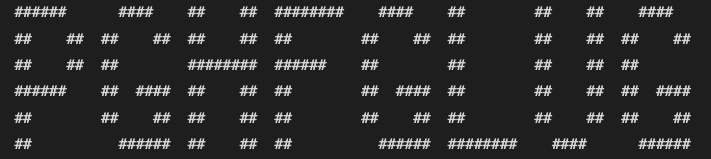